In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import os
import math
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn import preprocessing
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import random 
random.seed(33)
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter

/home/dsc/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/dsc/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
listings = pd.read_csv('../Data/listings_cleanTotal.csv')

In [34]:
performance2017 = pd.read_excel('../Data/Performance Approach V0.xls')
columns_to_keep = ['id', 'Published_Before_2017', '2017_Total_Income_Est','2017_Total_Number_Reviews']
performance2017 = performance2017[columns_to_keep]

In [38]:
listingsPerformance = pd.concat([listings, performance2017], axis=1, join='inner')

In [39]:
listingsPerformance['avg_nights'] = 4.2
listingsPerformance['occupancy_est'] = (listingsPerformance['2017_Total_Number_Reviews']/0.7) * (listingsPerformance[['avg_nights', 'minimum_nights']].max(axis=1))
listingsPerformance['max_occupancy'] = 365 * 0.8

listingsPerformance['occupancy_est'] = listingsPerformance[['max_occupancy','occupancy_est']].min(axis=1)

In [40]:
#We remove listings that didn't have performance and have no availability in 2018 as it might mean that they are not really available for booking
listingsPerfClean = listingsPerformance[(listingsPerformance['Published_Before_2017']=='yes') & ((listingsPerformance['2017_Total_Number_Reviews']!=0) | (listingsPerformance['availability_365']!=0))]

In [41]:
numerical_features = ['latitude', 'longitude', 'accommodates', 'bathrooms','bedrooms', 'minimum_nights',
                      'review_scores_value','price','2017_Total_Number_Reviews']
boolean_features = ['instant_bookable', 'is_business_travel_ready', 'Parking', 'Wifi']
categorical_features = ['neighbourhood_cleansed', 'property_type', 'cancellation_policy']
listings_categorical = pd.get_dummies(listingsPerfClean[categorical_features], columns=categorical_features, 
                                        prefix=["Neigh", "Property", "CancPol"])
#listingsPerfClean2 = pd.concat([listingsPerfClean['room_type'],listingsPerfClean[numerical_features],
                             #listingsPerfClean[categorical_features],listingsPerfClean[boolean_features]], axis=1)
listingsPerfClean2 = pd.concat([listingsPerfClean['room_type'],listingsPerfClean[numerical_features],
                              listings_categorical,listingsPerfClean[boolean_features]], axis=1)

In [46]:
numerical_features = ['latitude', 'longitude', 'accommodates', 'bathrooms','bedrooms', 'minimum_nights',
                      'review_scores_value','price','occupancy_est']
boolean_features = ['instant_bookable', 'is_business_travel_ready', 'Parking', 'Wifi']
categorical_features = ['property_type', 'cancellation_policy']
listings_categorical = pd.get_dummies(listingsPerfClean[categorical_features], columns=categorical_features, 
                                        prefix=["Property", "CancPol"])
#listingsPerfClean2 = pd.concat([listingsPerfClean['room_type'],listingsPerfClean[numerical_features],
                             #listingsPerfClean[categorical_features],listingsPerfClean[boolean_features]], axis=1)
listingsPerfClean2 = pd.concat([listingsPerfClean['room_type'],listingsPerfClean[numerical_features],
                              listings_categorical,listingsPerfClean[boolean_features]], axis=1)

In [47]:
#for cat_col in categorical_features:
#    listingsPerfClean2[cat_col] = preprocessing.LabelEncoder().fit_transform(listingsPerfClean2[cat_col])

In [48]:
listingsHome = listingsPerfClean2[listingsPerfClean2['room_type']=='Entire home/apt'].drop(['room_type'],axis=1)
listingsRoom = listingsPerfClean2[listingsPerfClean2['room_type']=='Private room'].drop(['room_type'],axis=1)
listingsSharedRoom = listingsPerfClean2[listingsPerfClean2['room_type']=='Shared room'].drop(['room_type'],axis=1)

In [49]:
listingsHome.shape

(8419, 41)

/home/dsc/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


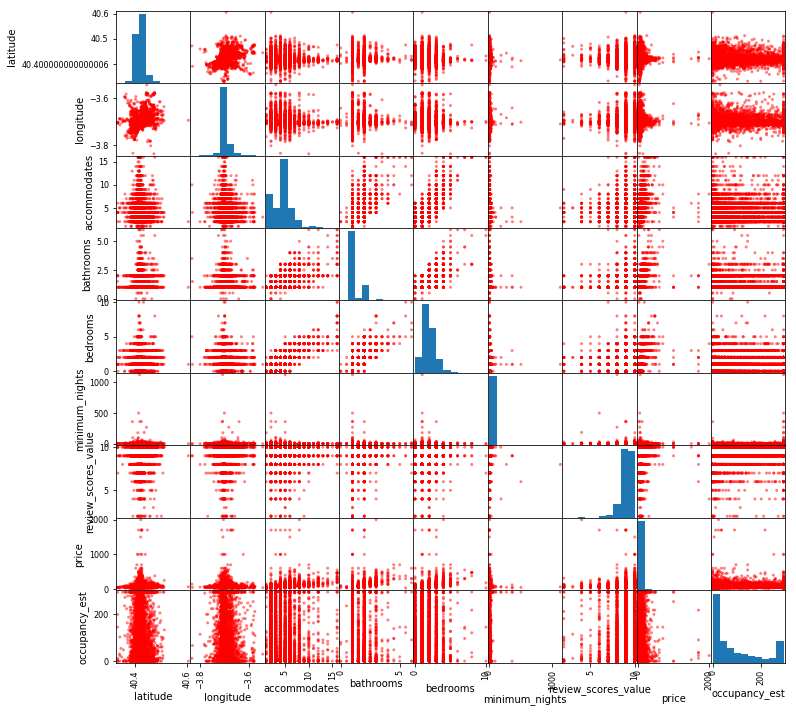

In [44]:
axs = pd.scatter_matrix(listingsHome[numerical_features],
                        figsize=(12, 12), c='red')

Accommodates, bathrooms and bedrooms seem to be the only features with a "clear" positive correlation

In [108]:
#RS = RobustScaler()
#listingsHome[numerical_features] = RS.fit_transform(listingsHome[numerical_features])